# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading our dataset.**

In [ ]:
# Saeel's Link
df = pd.read_csv("/content/drive/MyDrive/DS203/Project/train-sample.csv")

In [ ]:
# df.drop(df.tail(70000).index, inplace= True)

In [ ]:
# Pranav's Link
# df = pd.read_csv("/content/drive/MyDrive/College/Project/train-sample.csv")

Link to our dataset: https://drive.google.com/drive/folders/1jfr5rS-tSfM5UZQDQDvfYO26kECJS84D?usp=share_link

# **Exploratory Data Analysis**

In [ ]:
df.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,open
1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,open
2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,open
3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,too localized
4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,open


In [ ]:
# The below command gives the number of unique values in each of the columns of the DataFrame
# To get unique values of each of the columns, use the command "df.columns.unique()"
df.nunique()

PostId                                 140272
PostCreationDate                       140118
OwnerUserId                             94215
OwnerCreationDate                       94149
ReputationAtPostCreation                 6423
OwnerUndeletedAnswerCountAtPostTime       965
Title                                  140192
BodyMarkdown                           140270
Tag1                                     5209
Tag2                                     9292
Tag3                                    11080
Tag4                                    10027
Tag5                                     7605
PostClosedDate                          70070
OpenStatus                                  5
dtype: int64

In [ ]:
# This function gives us the number of columns in our dataframe
print("Total number of columns:", len(df.columns))

Total number of columns: 15


In [ ]:
# This function gives us the number of rows in our dataframe
print("Total number of rows:", len(df))

Total number of rows: 140272


In [ ]:
# This function gives the data type of each column
df.dtypes

PostId                                  int64
PostCreationDate                       object
OwnerUserId                             int64
OwnerCreationDate                      object
ReputationAtPostCreation                int64
OwnerUndeletedAnswerCountAtPostTime     int64
Title                                  object
BodyMarkdown                           object
Tag1                                   object
Tag2                                   object
Tag3                                   object
Tag4                                   object
Tag5                                   object
PostClosedDate                         object
OpenStatus                             object
dtype: object

In [ ]:
# We can see that "PostID" and "OwnerUserID" are ID columns. These columns do not have any kind of predictive powers. So we can safely drop these two columns
df.drop(columns= ["PostId", "OwnerUserId"], inplace= True)

In [ ]:
df.head()

,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,05/18/2011 14:14:05,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,open
1,02/02/2011 11:30:10,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,open
2,07/22/2010 17:21:54,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,open
3,04/03/2012 09:18:39,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,too localized
4,05/02/2012 21:25:01,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,open


In [ ]:
# Provides the statistics of the features which are non-categorical in the dataset
df.describe()

,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime
count,140272.000000,140272.000000
mean,506.633904,19.467891
std,2495.902443,90.120686
min,-34.000000,0.000000
25%,1.000000,0.000000
50%,35.000000,1.000000
75%,267.000000,8.000000
max,209631.000000,5772.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


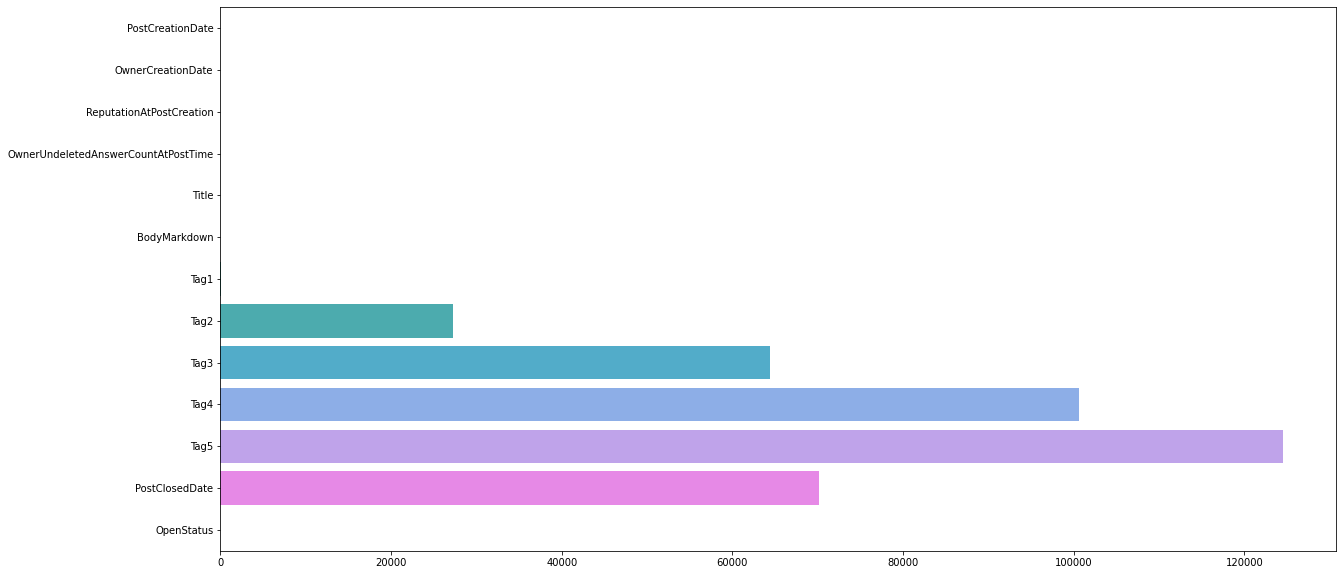

In [ ]:
# We plot a barplot where the y axis consists of the column names and x axis gives the number of null values in the respective columns
y = df.columns
x = df.isnull().sum()
plt.figure(figsize= (20,10))
sns.barplot(x, y, orient= "h")

One more important observation is that about the Tag columns. Except the "Tag1" column, all other columns have high number of null values. According to the information on the original competition site, most of the questions will have a value in "Tag1" column, but the rest Tag columns are optional.

In [ ]:
(df.isnull().sum())*100/(len(df))

PostCreationDate                        0.000000
OwnerCreationDate                       0.000000
ReputationAtPostCreation                0.000000
OwnerUndeletedAnswerCountAtPostTime     0.000000
Title                                   0.000000
BodyMarkdown                            0.000000
Tag1                                    0.007129
Tag2                                   19.427256
Tag3                                   45.880860
Tag4                                   71.733489
Tag5                                   88.797479
PostClosedDate                         50.000000
OpenStatus                              0.000000
dtype: float64

We can see that very small fraction of "Tag1" have missing values. 

We have created a new column named "Tags" which is the combination of all the previous Tag columns. Here, we are reducing the number of related feature columns as well as eliminating the null values in the dataset. This boosts the model performance. 


In [ ]:
df["Tag1"] = df["Tag1"].replace(np.nan, ' ')
df["Tag2"] = df["Tag2"].replace(np.nan, ' ')
df["Tag3"] = df["Tag3"].replace(np.nan, ' ')
df["Tag4"] = df["Tag4"].replace(np.nan, ' ')
df["Tag5"] = df["Tag5"].replace(np.nan, ' ')

df["Tags"] = df["Tag1"]+' '+df["Tag2"]+' '+df["Tag3"]+' '+df["Tag4"]+' '+df["Tag5"]

We drop the previous Tag columns

In [ ]:
col = ['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']
df.drop(columns= col, inplace= True)

In [ ]:
df.head()

,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,PostClosedDate,OpenStatus,Tags
0,05/18/2011 14:14:05,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,NaN,open,mongodb
1,02/02/2011 11:30:10,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,NaN,open,dom xsd jaxp
2,07/22/2010 17:21:54,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,NaN,open,sql-server database-design enums
3,04/03/2012 09:18:39,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,04/15/2012 21:12:48,too localized,php vb.net
4,05/02/2012 21:25:01,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",NaN,open,mongodb spring-data


We will binary encode the Tags column

In [ ]:
%%capture
!pip install category_encoders

In [ ]:
import category_encoders as ce
encoder = ce.binary.BinaryEncoder()
tags = encoder.fit_transform(df["Tags"])
df = pd.concat([df, tags], axis= 1)
df.drop(["Tags"], axis= 1, inplace= True)

Reference: https://contrib.scikit-learn.org/category_encoders/ 

In [ ]:
df.head()

,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,PostClosedDate,OpenStatus,Tags_0,Tags_1,...,Tags_7,Tags_8,Tags_9,Tags_10,Tags_11,Tags_12,Tags_13,Tags_14,Tags_15,Tags_16
0,05/18/2011 14:14:05,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,NaN,open,0,0,...,0,0,0,0,0,0,0,0,0,1
1,02/02/2011 11:30:10,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,NaN,open,0,0,...,0,0,0,0,0,0,0,0,1,0
2,07/22/2010 17:21:54,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,NaN,open,0,0,...,0,0,0,0,0,0,0,0,1,1
3,04/03/2012 09:18:39,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,04/15/2012 21:12:48,too localized,0,0,...,0,0,0,0,0,0,0,1,0,0
4,05/02/2012 21:25:01,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",NaN,open,0,0,...,0,0,0,0,0,0,0,1,0,1


In the dataset, we have been given the columns "PostCreationDate" and "OwnerCreationDate". 
We can create a new feature signifying how old the owner account is by finding the difference between these two datetime columns in seconds

In [ ]:
def accountAge(df):
  df["PostCreationDate"] = pd.to_datetime(df["PostCreationDate"])
  df["OwnerCreationDate"] = pd.to_datetime(df["OwnerCreationDate"])
  df["AccAge"] = (df["PostCreationDate"] - df["OwnerCreationDate"])/np.timedelta64(1, 's')
  col = ["PostCreationDate", "OwnerCreationDate"]
  return df

References: 

*   https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
*   https://www.geeksforgeeks.org/python-pandas-to_datetime/




In [ ]:
df = accountAge(df)

In [ ]:
df.head()

,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,PostClosedDate,OpenStatus,Tags_0,Tags_1,...,Tags_8,Tags_9,Tags_10,Tags_11,Tags_12,Tags_13,Tags_14,Tags_15,Tags_16,AccAge
0,2011-05-18 14:14:05,2010-09-17 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,NaN,open,0,0,...,0,0,0,0,0,0,0,0,1,21009539.0
1,2011-02-02 11:30:10,2010-10-03 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,NaN,open,0,0,...,0,0,0,0,0,0,0,1,0,10547952.0
2,2010-07-22 17:21:54,2010-07-22 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,NaN,open,0,0,...,0,0,0,0,0,0,0,1,1,1414.0
3,2012-04-03 09:18:39,2011-07-19 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,04/15/2012 21:12:48,too localized,0,0,...,0,0,0,0,0,0,1,0,0,22373759.0
4,2012-05-02 21:25:01,2011-02-04 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",NaN,open,0,0,...,0,0,0,0,0,0,1,0,1,39151167.0


Now, we don't need the OwnerCreationDate and PostCreationDate columns. So, we drop them

In [ ]:
df.drop(columns= ["OwnerCreationDate", "PostCreationDate"], inplace= True)

We create a new column by combining the columns "Title" and "BodyMarkdown" and then drop the two columns.

In [ ]:
df["Title"] = df["Title"].str.lower()
df["BodyMarkdown"] = df["BodyMarkdown"].str.lower()
df.head()

,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,PostClosedDate,OpenStatus,Tags_0,Tags_1,Tags_2,Tags_3,...,Tags_8,Tags_9,Tags_10,Tags_11,Tags_12,Tags_13,Tags_14,Tags_15,Tags_16,AccAge
0,1,2,for mongodb is it better to reference an objec...,i am building a corpus of indexed sentences in...,NaN,open,0,0,0,0,...,0,0,0,0,0,0,0,0,1,21009539.0
1,192,24,how to insert schemalocation in a xml document...,i create a xml document with jaxp and search a...,NaN,open,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10547952.0
2,1,0,too many lookup tables,what are the adverse effects of having too man...,NaN,open,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1414.0
3,4,1,what is this php code in vb.net,i am looking for the vb.net equivalent of this...,04/15/2012 21:12:48,too localized,0,0,0,0,...,0,0,0,0,0,0,1,0,0,22373759.0
4,334,14,spring-data mongodb querying multiple classes ...,"with spring-data, you can use the @document an...",NaN,open,0,0,0,0,...,0,0,0,0,0,0,1,0,1,39151167.0


In [ ]:
df["Description"] = df["Title"] + ' ' + df["BodyMarkdown"]
df.drop(["Title", "BodyMarkdown"], axis= 1, inplace= True)
df.head()

,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,PostClosedDate,OpenStatus,Tags_0,Tags_1,Tags_2,Tags_3,Tags_4,Tags_5,...,Tags_9,Tags_10,Tags_11,Tags_12,Tags_13,Tags_14,Tags_15,Tags_16,AccAge,Description
0,1,2,NaN,open,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21009539.0,for mongodb is it better to reference an objec...
1,192,24,NaN,open,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10547952.0,how to insert schemalocation in a xml document...
2,1,0,NaN,open,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1414.0,too many lookup tables what are the adverse e...
3,4,1,04/15/2012 21:12:48,too localized,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,22373759.0,what is this php code in vb.net i am looking f...
4,334,14,NaN,open,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,39151167.0,spring-data mongodb querying multiple classes ...


We map the categorical values in the OpenStatus column with integers starting from zero.

In [ ]:
df["OpenStatus"] = df["OpenStatus"].map({"not a real question" : 0, "not constructive" : 1, "off topic" : 2, "open" : 3, "too localized" : 4})
df.head()

,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,PostClosedDate,OpenStatus,Tags_0,Tags_1,Tags_2,Tags_3,Tags_4,Tags_5,...,Tags_9,Tags_10,Tags_11,Tags_12,Tags_13,Tags_14,Tags_15,Tags_16,AccAge,Description
0,1,2,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21009539.0,for mongodb is it better to reference an objec...
1,192,24,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10547952.0,how to insert schemalocation in a xml document...
2,1,0,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1414.0,too many lookup tables what are the adverse e...
3,4,1,04/15/2012 21:12:48,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,22373759.0,what is this php code in vb.net i am looking f...
4,334,14,NaN,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,39151167.0,spring-data mongodb querying multiple classes ...


PostClosedDate doesn't correlate well with our objective. So, we drop the same.

In [ ]:
df.drop(["PostClosedDate"], axis= 1, inplace= True)

In [ ]:
df.dtypes

ReputationAtPostCreation                 int64
OwnerUndeletedAnswerCountAtPostTime      int64
OpenStatus                               int64
Tags_0                                   int64
Tags_1                                   int64
Tags_2                                   int64
Tags_3                                   int64
Tags_4                                   int64
Tags_5                                   int64
Tags_6                                   int64
Tags_7                                   int64
Tags_8                                   int64
Tags_9                                   int64
Tags_10                                  int64
Tags_11                                  int64
Tags_12                                  int64
Tags_13                                  int64
Tags_14                                  int64
Tags_15                                  int64
Tags_16                                  int64
AccAge                                 float64
Description  

In [ ]:
df.to_csv('EDA.csv')
from google.colab import files
files.download("EDA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dc = df.copy()